# Credit Card Payment Default

### Business Question

#### Can we accurately predict the probability of a customer defaulting on their payments?


In [8]:
#importing libraries we may need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
#import the dataset
credit_df=pd.read_csv(r'C:\Users\Robin\Downloads\capstone_project\_data\taiwan_data.csv')

## Data dictionary
<table>
  <tr>
    <th style="text-align: left; background: lightgrey">Column Name</th>
    <th style="text-align: left; background: lightgrey">Column Contents</th>
  </tr>
  <tr>
    <td style="text-align: left">ID</th>
    <td style="text-align: left">ID of each client</th>
  <tr>
  <tr>
    <td style="text-align: left">LIMIT_BAL</th>
    <td style="text-align: left">Amount of given credit in NT dollars (includes individual and family/supplementary credit)</th>
  <tr>
<tr>
    <td style="text-align: left">SEX</th>
    <td style="text-align: left">Gender (1=male, 2=female)</th>
  <tr>
<tr>
    <td style="text-align: left">EDUCATION</th>
    <td style="text-align: left">Level of education(1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)</th>
  <tr>
<tr>
    <td style="text-align: left">MARRIAGE</th>
    <td style="text-align: left">Marital status (1=married, 2=single, 3=others)</th>
  <tr>
<tr>
    <td style="text-align: left">AGE</th>
    <td style="text-align: left">Age in years</th>
  <tr>
  <tr>
    <td style="text-align: left">PAY_0</th>
    <td style="text-align: left">Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, 
    … 8=payment delay for eight months, 9=payment delay for nine months and above)</th>
  <tr>
  <tr>
    <td style="text-align: left">PAY_2</th>
    <td style="text-align: left">Repayment status in August, 2005 (scale same as above)</th>
  <tr>
  <tr>
    <td style="text-align: left">PAY_3</th>
    <td style="text-align: left">Repayment status in July, 2005 (scale same as above)</th>
  <tr>
<tr>
    <td style="text-align: left">PAY_4</th>
    <td style="text-align: left">Repayment status in June, 2005 (scale same as above)</th>
  <tr>
  <tr>
    <td style="text-align: left">PAY_5</th>
    <td style="text-align: left">Repayment status in May, 2005 (scale same as above)</th>
  <tr>
  <tr>
    <td style="text-align: left">PAY_6</th>
    <td style="text-align: left">Repayment status in April, 2005 (scale same as above)</th>
  <tr>
<tr>
    <td style="text-align: left">BILL_AMT1</th>
    <td style="text-align: left">Amount of bill statement in September, 2005 (NT dollar)</th>
  <tr>
<tr>
    <td style="text-align: left">BILL_AMT2</th>
    <td style="text-align: left">Amount of bill statement in August, 2005 (NT dollar)</th>
  <tr>
  <tr>
    <td style="text-align: left">BILL_AMT3</th>
    <td style="text-align: left">Amount of bill statement in July, 2005 (NT dollar)</th>
  <tr>
  <tr>
    <td style="text-align: left">BILL_AMT4</th>
    <td style="text-align: left">Amount of bill statement in June, 2005 (NT dollar)</th>
  <tr>
  <tr>
    <td style="text-align: left">BILL_AMT5</th>
    <td style="text-align: left">Amount of bill statement in May, 2005 (NT dollar)</th>
  <tr>
  <tr>
    <td style="text-align: left">BILL_AMT6</th>
    <td style="text-align: left">Amount of bill statement in April, 2005 (NT dollar)</th>
  <tr>
  <tr>
    <td style="text-align: left">PAY_AMT1</th>
    <td style="text-align: left">Amount of previous payment in September, 2005 (NT dollar)</th>
  <tr>
 <tr>
    <td style="text-align: left">PAY_AMT2</th>
    <td style="text-align: left">Amount of previous payment in August, 2005 (NT dollar)</th>
  <tr>
   <tr>
    <td style="text-align: left">PAY_AMT3</th>
    <td style="text-align: left">Amount of previous payment in July, 2005 (NT dollar)</th>
  <tr>
 <tr>
    <td style="text-align: left">PAY_AMT4</th>
    <td style="text-align: left">Amount of previous payment in June, 2005 (NT dollar)</th>
  <tr>
   <tr>
    <td style="text-align: left">PAY_AMT5</th>
    <td style="text-align: left">Amount of previous payment in May, 2005 (NT dollar)</th>
  <tr>
 <tr>
    <td style="text-align: left">PAY_AMT6</th>
    <td style="text-align: left">Amount of previous payment in April, 2005 (NT dollar)</th>
  <tr>
 <tr>
    <td style="text-align: left">default.payment.next.month</th>
    <td style="text-align: left">Default payment (1=yes, 0=no)</th>
  <tr>
</table>

## Overview of the data

In [10]:
#lets look at the shape of the dataframe
#credit_df.shape
print(f'We have {credit_df.shape[0]} rows and {credit_df.shape[1]} columns in the dataset.')

We have 30000 rows and 25 columns in the dataset.


In [11]:
#Lets take a closer look the dataset, by first taking a snapshot of the what the data looks like.
credit_df.head() 

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [12]:
credit_df.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [13]:
credit_df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


### Initial observations

- Slightly larger number of female's than male.
- Majority of the people are either married or single
- Average age of the customers is 35 years old. 
- The PAY_ columns range is actually -2 to 8 whereas in the dictionary it said -1 to 9.
- Most of the customers are well educated i.e university graduates
- Amount of limit balance varies quite a bit as the sd is quite large
- In general people do not default on thier payments, however we want to focus on those who do default

## Data cleaning and preprocessing

In [14]:
#check for nulls,missing values and duplicates

credit_df.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [15]:
#check for duplicates
credit_df.duplicated().sum()

0

In [16]:
credit_df.columns
#pd.DataFrame(credit_df.columns)
#looking at columns names to check all the column names are appropriate

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

#The columns PAY_0-PAY_6 are not very intuitive columns names. These columns represent the repayment history of the customer, so we can rename them to something like HIST_PAY1
The sixth column starts at PAY_0 but then skips to PAY_2. Looking at the other columns in a group such as BILL_AMT and PAY_AMT they all start at 1 and go up to 6. So we need to rename the column PAY_0 as PAY_1 so it has the same format as the other columns and avoid confusion. 

Default payment next month is the target column i.e the one we want to predict. This column name should also be changed for easier access,reference and most importantly so it follows the same uniform naming convention as the other columns - 1 or 2 words in capitals that succinctly describes the data contained in the column.

In [17]:
new_column_names = {'PAY_0': 'PAY_1',
        'default payment next month':'DEFAULT'
        }

In [18]:
credit_df.rename(columns=new_column_names,inplace=True)


In [19]:
credit_df.info() # check they have been changed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_1      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  BILL_AMT2  30000 non-null  int64
 14  BILL_AMT3  30000 non-null  int64
 15  BILL_AMT4  30000 non-null  int64
 16  BILL_AMT5  30000 non-null  int64
 17  BILL_AMT6  30000 non-null  int64
 18  PAY_AMT1   30000 non-null  int64
 19  PAY_AMT2   30000 non-null  int64
 20  PAY_AMT3   30000 non-null  int64
 21  PAY_AMT4   3

Lets focus on cleaning and checking for inconsistencies in the demographic columns of the dataset first.

##### 1. SEX
From the data dictionary we already know that sex has the values 1 and 2 representing male and female. However in computing binary values are traditionally represented as 0 and 1, so we will change them.



In [20]:
credit_df['SEX']

0        2
1        2
2        2
3        2
4        1
        ..
29995    1
29996    1
29997    1
29998    1
29999    1
Name: SEX, Length: 30000, dtype: int64

In [21]:
credit_df['SEX']=credit_df['SEX'].replace({1: 0, 2: 1}) 

In [22]:
credit_df['SEX'].value_counts() # check we only have 0 and 1 left

1    18112
0    11888
Name: SEX, dtype: int64

#### Education
Education also has some extra values. We already know there is 2 redundent values of 5 and 6. We have 4 to denote unknown or other education status. We can do a value counts to check if there are anymore unknown values and if there is also assign them to 4.

In [23]:
credit_df['EDUCATION'].value_counts(normalize=True)*100 # as suspected another unknown value - 0,not mentioned in description

2    46.766667
1    35.283333
3    16.390000
5     0.933333
4     0.410000
6     0.170000
0     0.046667
Name: EDUCATION, dtype: float64

In [24]:
credit_df['EDUCATION']=credit_df['EDUCATION'].replace([0,5,6], 4 )
credit_df['EDUCATION'].value_counts(normalize=True)*100 # now do get dummies so we only have 3 columns left

2    46.766667
1    35.283333
3    16.390000
4     1.560000
Name: EDUCATION, dtype: float64

There is actually 3 unknown values: 0,5,6. We can map these to the value 4 to refer to other either instituations or other unknown place of study.

However upon doing some external reseach, I found that Taiwan has a very high percentage of education completion in general. In fact around 94.7% of people have passed high school and gone onto some sort of higher education or senior vocational course . Based on this information, it is safe to assume that the unknown values and other category can be grouped together in the value 3, as it is highly likely that these people have passed high school at very the least.
Additionally since adding the 3 unknown values to 4 gives us 468 values which accounts for less than 1.56% of the entire column it is insignificant in making predictions which means it can only contribute to making models more computationally expensive to compute.

In [25]:
education_df = pd.get_dummies(credit_df['EDUCATION'],prefix='Education') # or undo this and just do a get dummies instead


In [26]:
education_df.drop(columns=['Education_4'], inplace=True)

In [27]:
education_df

,Education_1,Education_2,Education_3
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
29995,0,0,1
29996,0,0,1
29997,0,1,0
29998,0,0,1


In [28]:
education_df.value_counts()

Education_1  Education_2  Education_3
0            1            0              14030
1            0            0              10585
0            0            1               4917
                          0                468
dtype: int64

#### Marriage

This also has 1 unknown value of 0, which we can change to 3 (others)

In [29]:
credit_df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [30]:
# random 0 value - not mentioned in description anywhere, lets change it to others

credit_df['MARRIAGE']=credit_df['MARRIAGE'].replace(0,3)

In [31]:
credit_df['MARRIAGE'].value_counts(normalize=True)*100 

2    53.213333
1    45.530000
3     1.256667
Name: MARRIAGE, dtype: float64

Married and single can essentially be represented as 1 columns of married or not. Although value 3 only accounts for 1.25% of the column we can at the moment have a separate column for it but later when we do PCA or feature engineering I suspect it will be unimportant in predictions ans thus will be removed or not included in the modelling.


In [32]:
credit_df['MARRIAGE']

0        1
1        2
2        2
3        1
4        1
        ..
29995    1
29996    2
29997    2
29998    1
29999    1
Name: MARRIAGE, Length: 30000, dtype: int64

In [33]:
marriage_df=pd.get_dummies(credit_df['MARRIAGE'],prefix='Marital_status',drop_first=True)

In [34]:
marriage_df

,Marital_status_2,Marital_status_3
0,0,0
1,1,0
2,1,0
3,0,0
4,0,0
...,...,...
29995,0,0
29996,1,0
29997,1,0
29998,0,0


In [35]:
#marriage_df.drop(columns=['Marital_status_3'], inplace=True)

In [36]:
credit_df_clean = pd.concat([credit_df,education_df, marriage_df], axis=1)
credit_df_clean.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,Education_1,Education_2,Education_3,Marital_status_2,Marital_status_3
0,1,20000,1,2,1,24,2,2,-1,-1,...,0,0,0,0,1,0,1,0,0,0
1,2,120000,1,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,0,1,0,1,0
2,3,90000,1,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,0,1,0,1,0
3,4,50000,1,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,0,1,0,0,0
4,5,50000,0,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,0,1,0,0,0


In [37]:
rename_col = {'Education_1': 'Education_higher',
        'Education_2':'Education_university',
        'Education_3':'Education_highschool',
        'Marital_status_2':'Marriage_Single',
        'Marital_status_3':'Marriage_Other'
        }

In [38]:
credit_df_clean.rename(columns=rename_col,inplace=True)
credit_df_clean.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,Education_higher,Education_university,Education_highschool,Marriage_Single,Marriage_Other
0,1,20000,1,2,1,24,2,2,-1,-1,...,0,0,0,0,1,0,1,0,0,0
1,2,120000,1,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,0,1,0,1,0
2,3,90000,1,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,0,1,0,1,0
3,4,50000,1,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,0,1,0,0,0
4,5,50000,0,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,0,1,0,0,0


In [39]:
# we can now drop the old columns
credit_df_clean=credit_df_clean.drop(columns=['EDUCATION','MARRIAGE'])


In [40]:
credit_df_clean

,ID,LIMIT_BAL,SEX,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,Education_higher,Education_university,Education_highschool,Marriage_Single,Marriage_Other
0,1,20000,1,24,2,2,-1,-1,-2,-2,...,0,0,0,0,1,0,1,0,0,0
1,2,120000,1,26,-1,2,0,0,0,2,...,1000,1000,0,2000,1,0,1,0,1,0
2,3,90000,1,34,0,0,0,0,0,0,...,1000,1000,1000,5000,0,0,1,0,1,0
3,4,50000,1,37,0,0,0,0,0,0,...,1200,1100,1069,1000,0,0,1,0,0,0
4,5,50000,0,57,-1,0,-1,0,0,0,...,10000,9000,689,679,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,0,39,0,0,0,0,0,0,...,5003,3047,5000,1000,0,0,0,1,0,0
29996,29997,150000,0,43,-1,-1,-1,-1,0,0,...,8998,129,0,0,0,0,0,1,1,0
29997,29998,30000,0,37,4,3,2,-1,0,0,...,22000,4200,2000,3100,1,0,1,0,1,0
29998,29999,80000,0,41,1,-1,0,0,0,-1,...,1178,1926,52964,1804,1,0,0,1,0,0


#### Demographic observations



The ID column is just an identifier, which also has no predictive value this is something we can remove later when modelling.



<AxesSubplot:xlabel='LIMIT_BAL', ylabel='Count'>

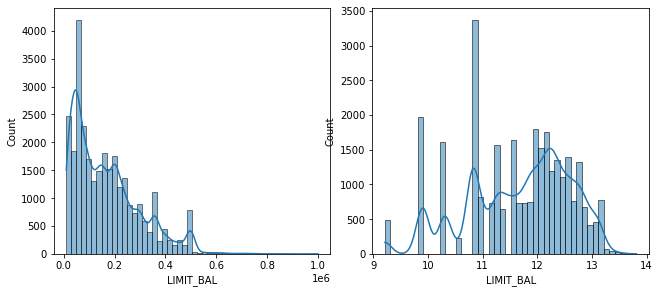

In [81]:
plt.subplots(1, 2, figsize = (9, 4))
plt.tight_layout()
  
plt.subplot(1, 2, 1)
sns.histplot(data=credit_df['LIMIT_BAL'],bins=50,kde=True) 

plt.subplot(1, 2, 2)
sns.histplot(limit_log, kde=True)




<AxesSubplot:>

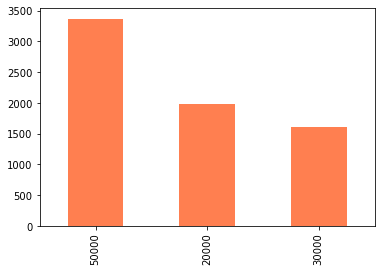

In [42]:
#sns.barplot(data=credit_df['LIMIT_BAL'].value_counts(),color='coral')
#credit_df['LIMIT_BAL'].value_counts(5).plot(kind='bar')
colors = sns.color_palette('rocket')
credit_df['LIMIT_BAL'].value_counts().head(3).plot(kind='bar',color='coral')

In [70]:
credit_df_clean['LIMIT_BAL'].describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

<AxesSubplot:ylabel='Frequency'>

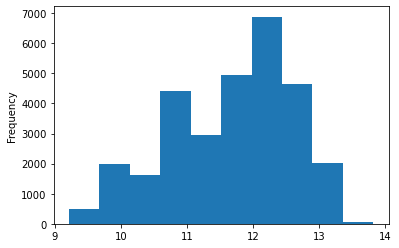

In [83]:
limit_log=np.log(credit_df_clean['LIMIT_BAL'])
limit_log.plot(kind='hist')
#np.log(credit_df_clean['LIMIT_BAL']).plot(kind='hist')

The most common credit balance limits are 50k, 20k and 30k respectively. Compared to the minimum 10k and maximum of 1000000 the figures are on the lower end of the range. However the maximum amount could be a outlier as its more than 2 standard deviations away from the mean.

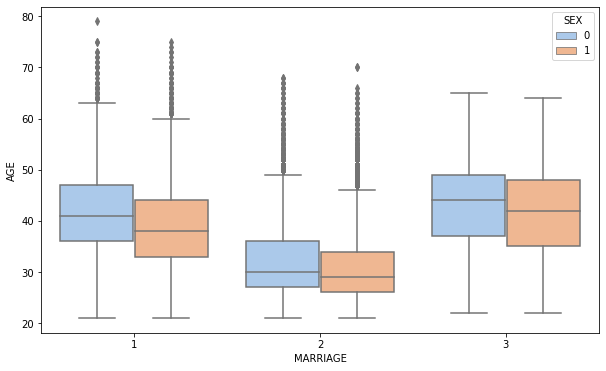

In [43]:

# Marriage, Age, and Sex
def boxplot_variation(feature1, feature2, feature3, width=16):
    fig, ax1 = plt.subplots(ncols=1, figsize=(width, 6))
    s = sns.boxplot(ax=ax1, x=feature1, y=feature2, hue=feature3,
                    data=credit_df, palette='pastel')
    #s.set_xticklabels(s.get_xticklabels(), rotation=90)
    plt.show();

boxplot_variation('MARRIAGE', 'AGE', 'SEX', 10)

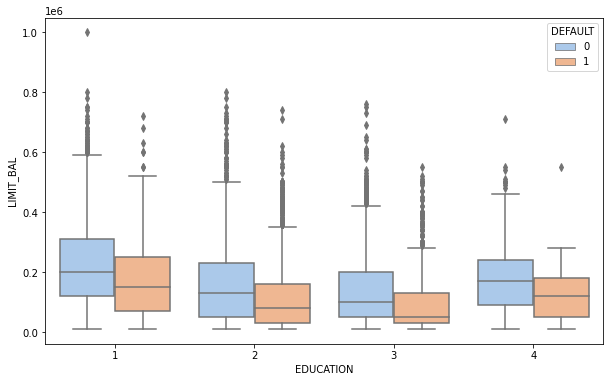

In [44]:
boxplot_variation('EDUCATION', 'LIMIT_BAL', 'DEFAULT', 10)

In [45]:
credit_df_pay_col=credit_df_clean.columns[4:10]

In [46]:
for month in credit_df_pay_col:
    print(sorted(credit_df_clean[month].unique()))

[-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
[-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
[-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
[-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
[-2, -1, 0, 2, 3, 4, 5, 6, 7, 8]
[-2, -1, 0, 2, 3, 4, 5, 6, 7, 8]


In [47]:

# These ranges are not mentioned in the description, let's change the range to back to -1-9?

for month in credit_df_clean.columns[4:10]:
    credit_df_clean[month]=credit_df_clean[month]+1
#                       inplace=True)


credit_df_clean['PAY_1'].value_counts()

 1    14737
 0     5686
 2     3688
-1     2759
 3     2667
 4      322
 5       76
 6       26
 9       19
 7       11
 8        9
Name: PAY_1, dtype: int64

In [48]:
credit_df['BILL_AMT1'].value_counts().sort_values()

4984         1
133572       1
24132        1
114227       1
30415        1
          ... 
316         63
326         72
780         76
390        244
0         2008
Name: BILL_AMT1, Length: 22723, dtype: int64

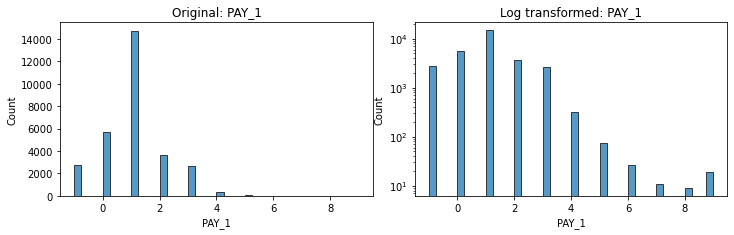

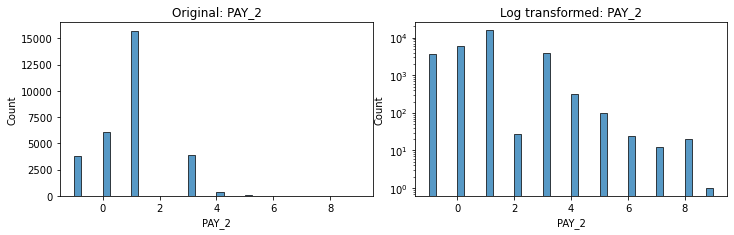

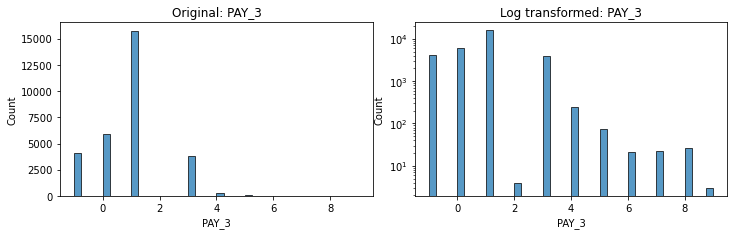

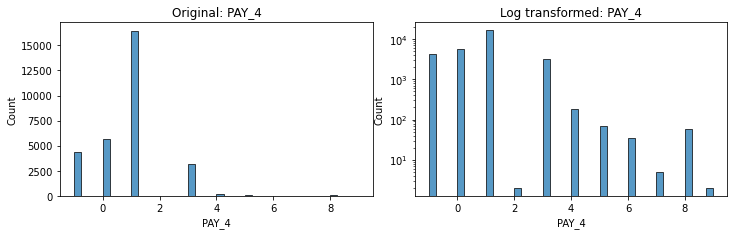

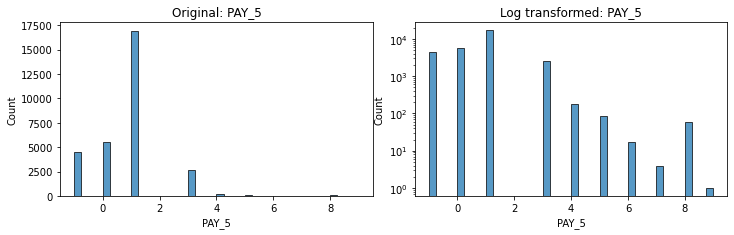

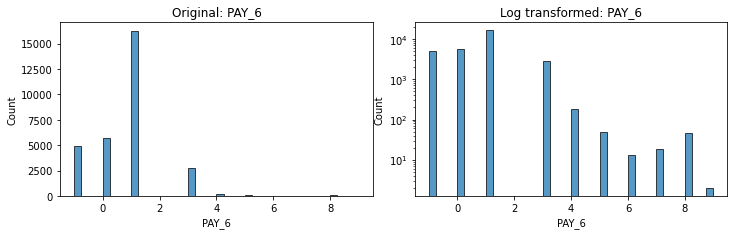

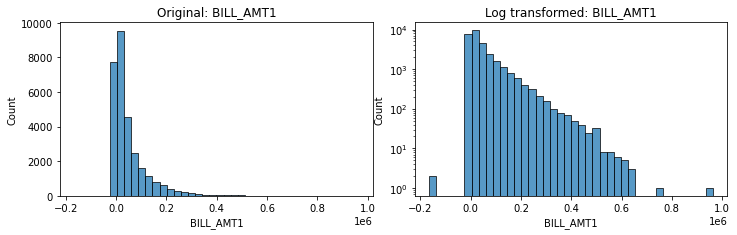

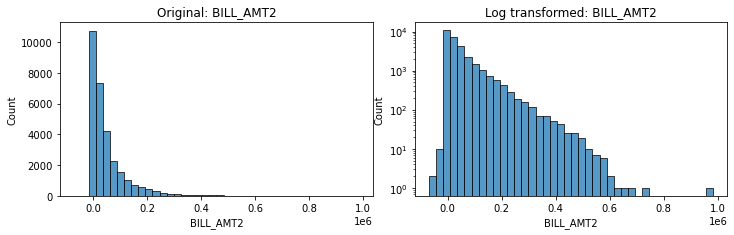

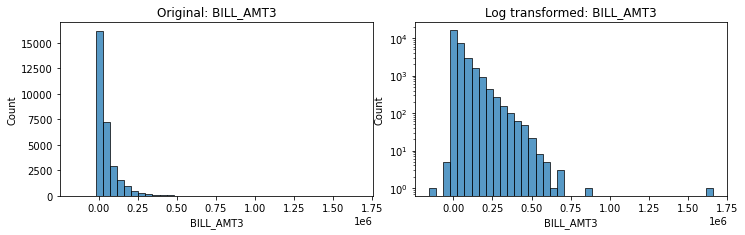

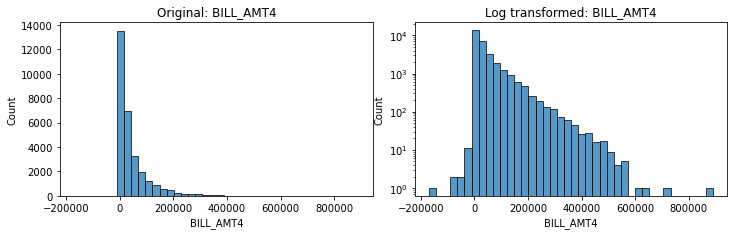

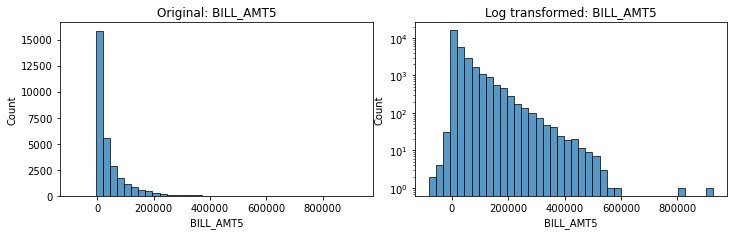

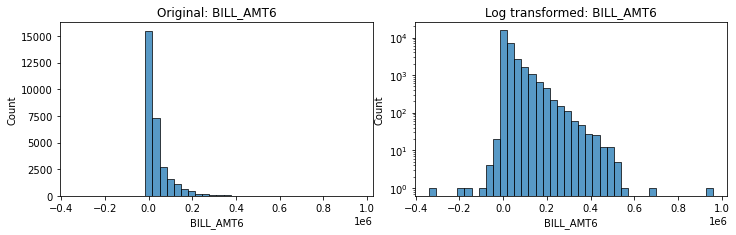

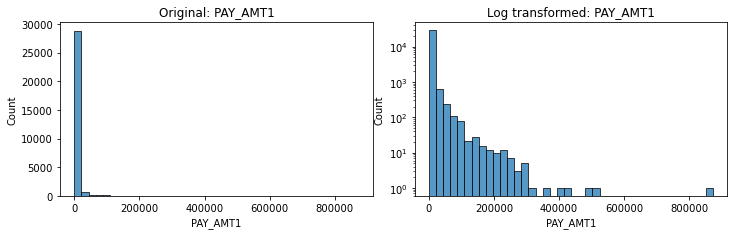

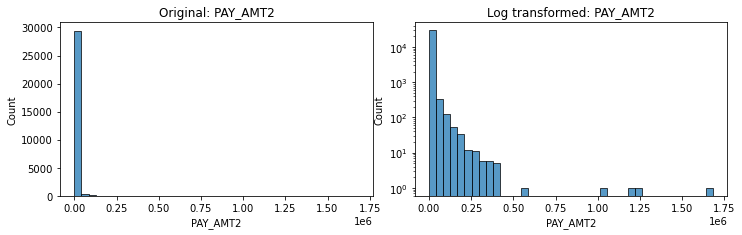

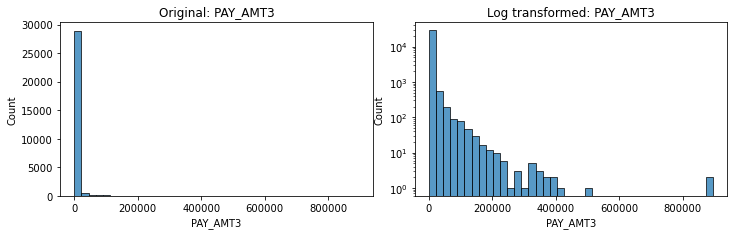

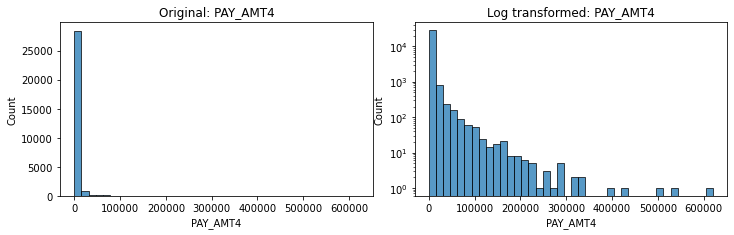

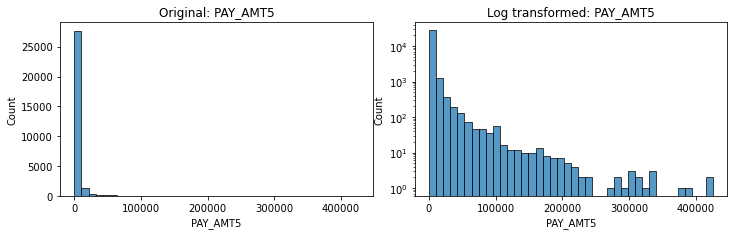

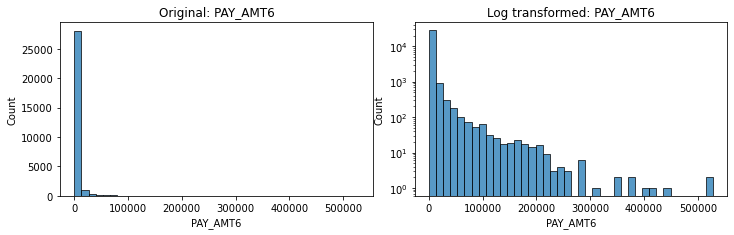

In [73]:
#idk if this works
for col in credit_df_clean.columns[4:22]:
    plt.subplots(1, 2, figsize = (10, 3))
    plt.tight_layout()
    
    plt.subplot(1, 2, 1)
    plt.title(f'Original: {col}')
    sns.histplot(credit_df_clean[col], bins = 40)
    
    plt.subplot(1, 2, 2)
    plt.title(f'Log transformed: {col}')
    sns.histplot(credit_df_clean[col], bins = 40)
    plt.yscale('log')

    
    plt.show()

#### Target column - default

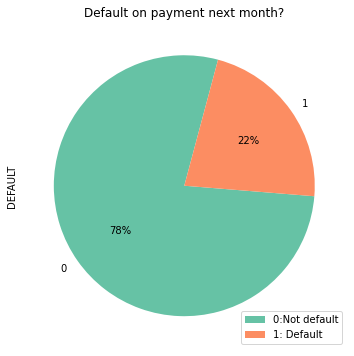

In [51]:

colours = sns.color_palette('Set2')[0:5]

(credit_df['DEFAULT'].value_counts(normalize=True)*100).plot(kind='pie',autopct='%.0f%%',colors=colours,legend=True, figsize=(14,6),startangle=75)
plt.legend(['0:Not default','1: Default'],loc='lower right')
plt.title('Default on payment next month?')
plt.show()

In [52]:
# import plotly.express as px
# v=credit_df['DEFAULT'].value_counts(normalize=True)*100
# fig= px.pie(credit_df)
# fig.show()

Very imbalanced dataset. This is normal as most people will have paid thier credit card bill on time. However I will have to do upsampling on the smaller class to avoid bias to the majority class, which can cause the number of false negatives predicted to be higher. 

<AxesSubplot:>

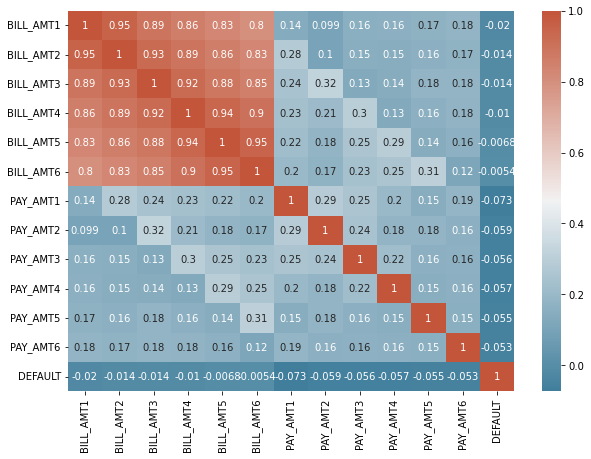

In [53]:
#credit_df[,:12,25]
#credit_df.iloc[:,12:25]

plt.figure(figsize=(10,7))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(credit_df.iloc[:,12:25].corr(),annot=True,cmap=cmap)


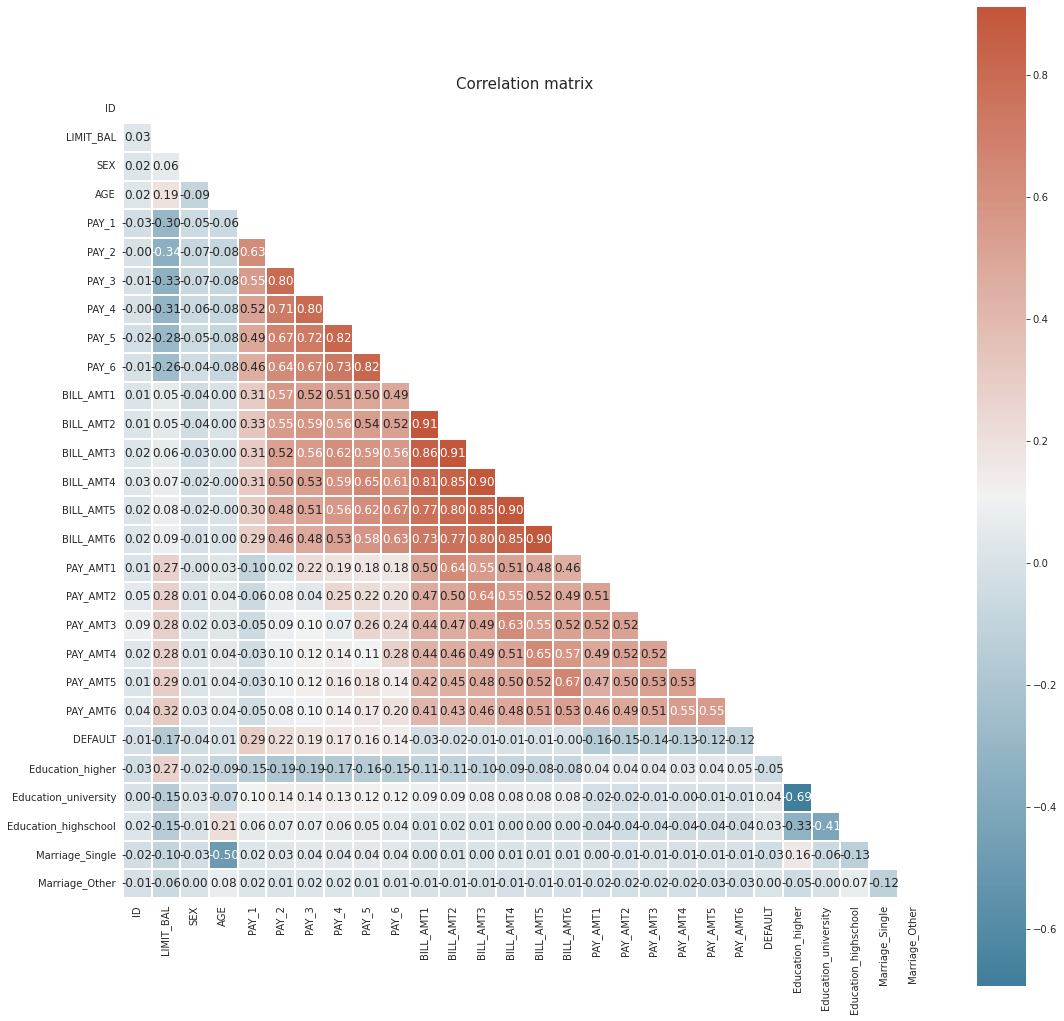

In [54]:
corr = credit_df_clean.corr(method='spearman') 
mask = np.zeros_like(corr,dtype=bool)
mask[np.triu_indices_from(mask)]=True
cmap = sns.diverging_palette(230, 20, as_cmap=True)
with sns.axes_style("white"):
    plt.subplots(figsize=(18, 18))
    sns.heatmap(corr, mask=mask, square=True, linewidths=.3, fmt='.2f', cmap=cmap, annot=True, annot_kws={"size": 12})
plt.title('Correlation matrix', size=15)
plt.show()

#ref - https://seaborn.pydata.org/examples/many_pairwise_correlations.html

loads of correlated columns - will have to do PCA on this.
notably with the default column limit bal is negatively correlated and pay_1 has the highest correlation followed by the res of the pay columns.

In [ ]:
#credit_df.to_csv('NAME.CSV')
credit_df_clean.to_csv('credit-df-dataset-cleaned.csv', index=False) # the index column will not be saved
